In [232]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [233]:
data_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'


In [234]:
df = pd.read_csv(data_url)

In [235]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [236]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [237]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

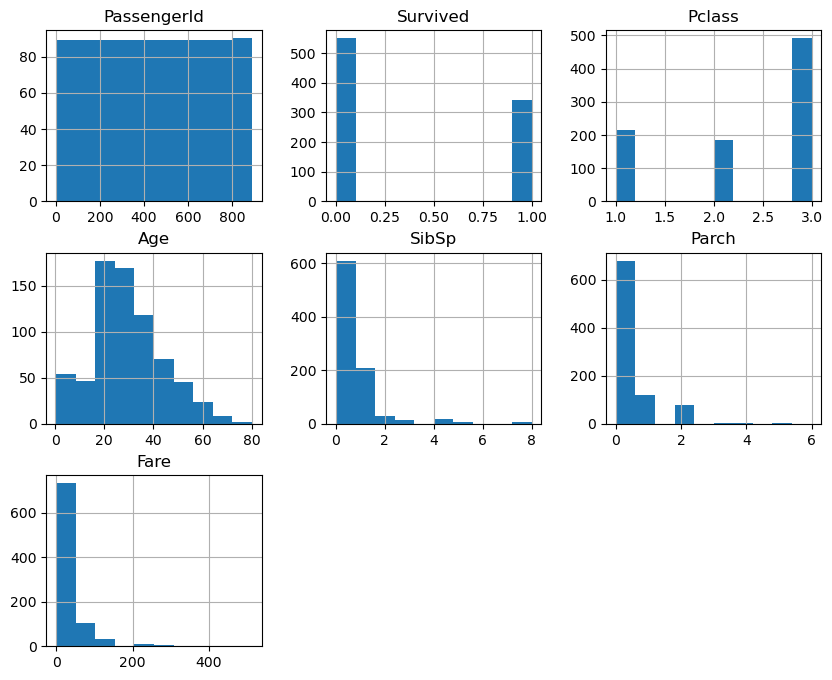

In [238]:
df.hist(figsize=(10, 8))

<Axes: >

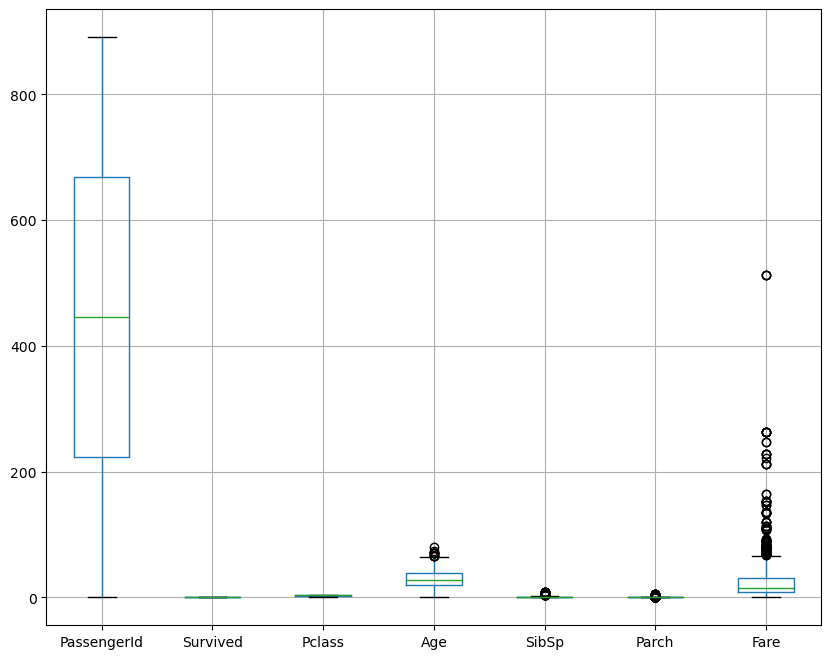

In [239]:
df.boxplot(figsize=(10,8))

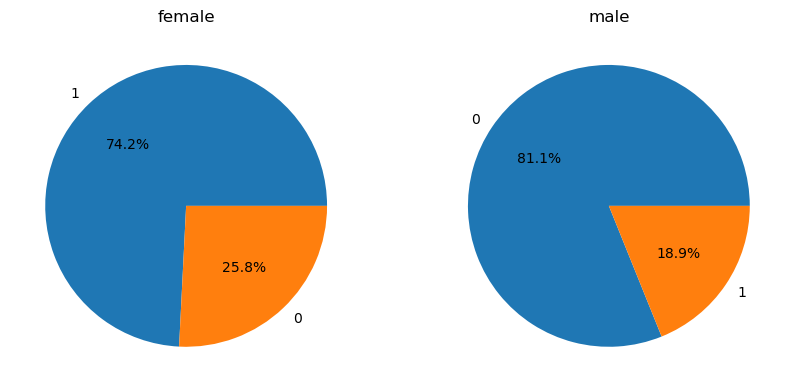

In [240]:
# Group the data by sex

if 'Embarked' in df.columns:
    grouped_data = df.groupby('Sex')

# Create a pie chart for each sex
fig, axes = mat.pyplot.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, (sex, group) in enumerate(grouped_data):
    group['Survived'].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%')
    axes[i].set_title(sex)
    axes[i].set_ylabel('')

   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3     0    0  22.0      1      0       0   
1            2         1       1     1    1  38.0      1      0       1   
2            3         1       3     2    1  26.0      0      0       2   
3            4         1       1     3    1  35.0      1      0       3   
4            5         0       3     4    0  35.0      0      0       4   

      Fare  Cabin  Embarked  
0   7.2500      0         0  
1  71.2833      1         1  
2   7.9250      0         0  
3  53.1000      2         0  
4   8.0500      0         0  


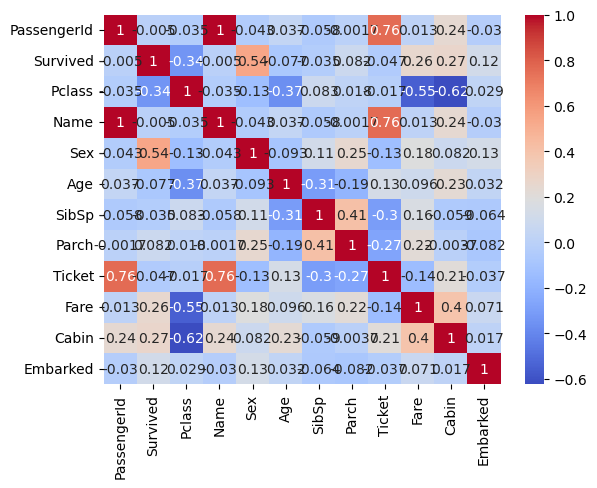

In [241]:
# Select the columns with string values
string_columns = df.select_dtypes(include=['object']).columns

# Define a mapping dictionary for each string column
mapping_dict = {}
for col in string_columns:
  mapping_dict[col] = {value: i for i, value in enumerate(df[col].unique())}

# Encode the string values
for col, mapping in mapping_dict.items():
  df[col] = df[col].map(mapping)

# Print the encoded data frame
print(df.head())





corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
mat.pyplot.show()

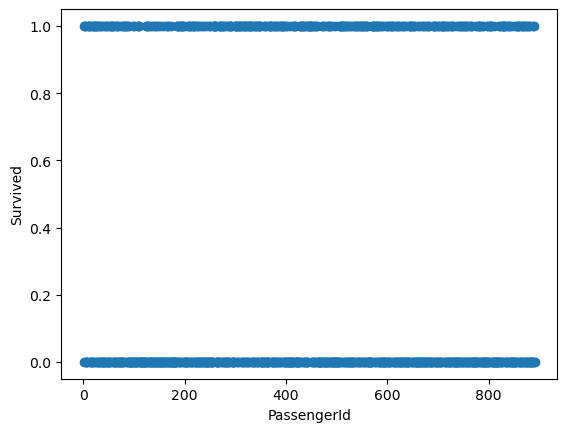

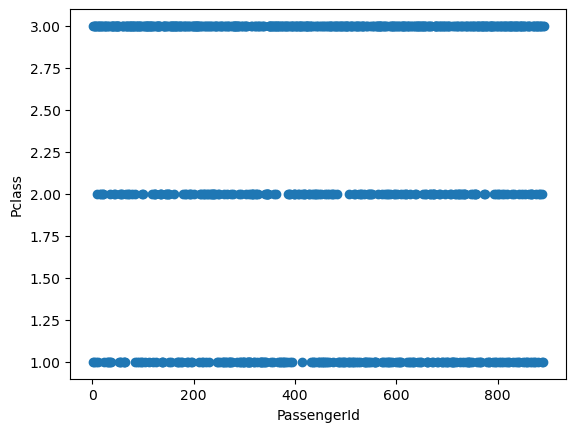

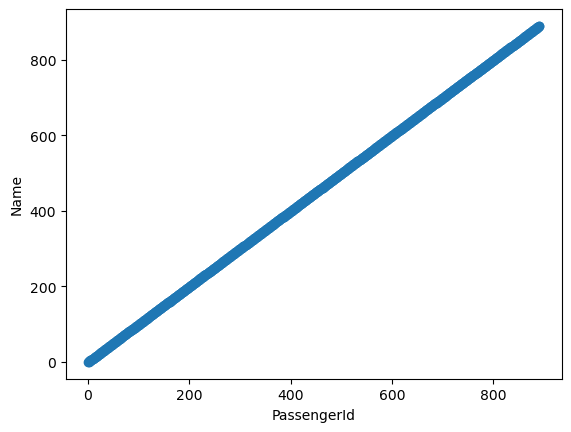

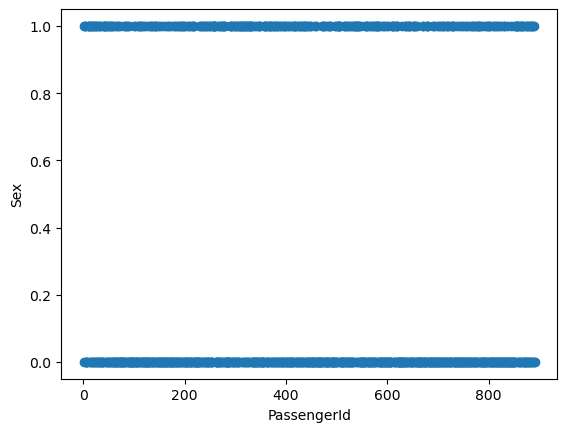

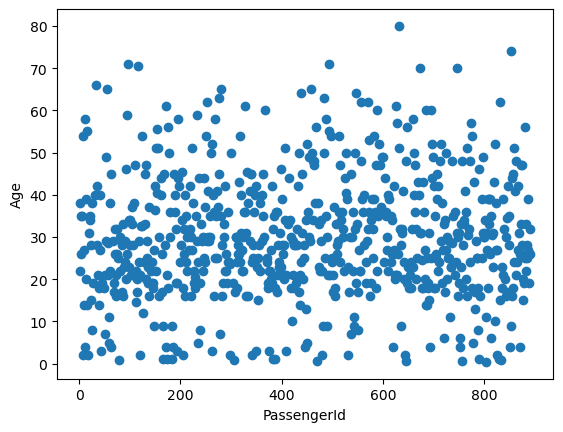

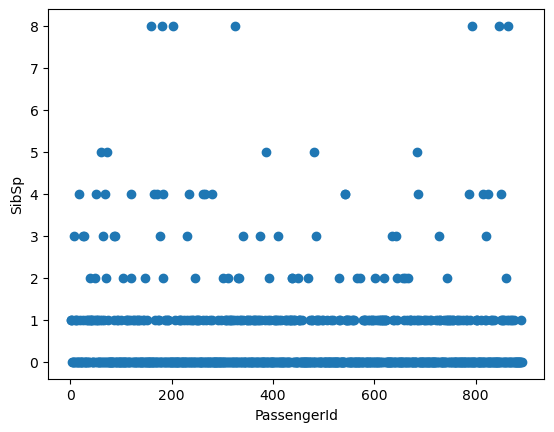

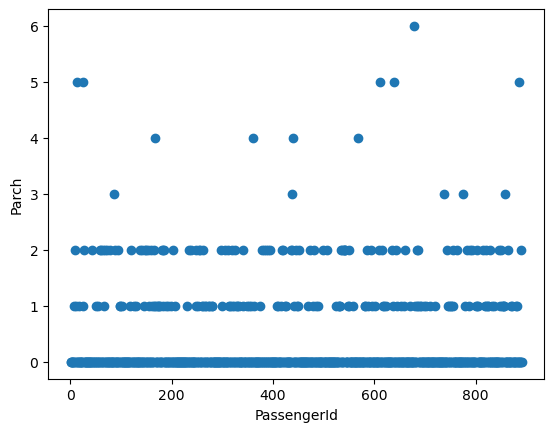

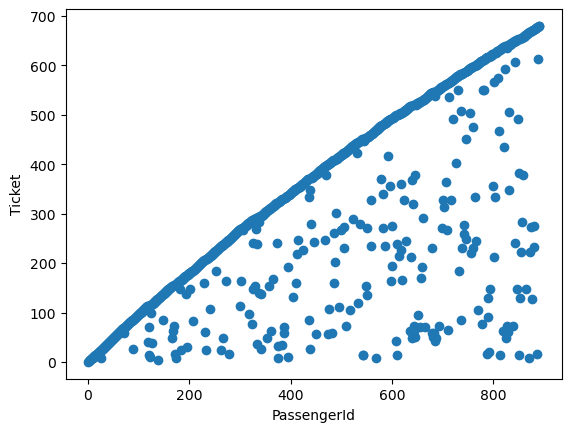

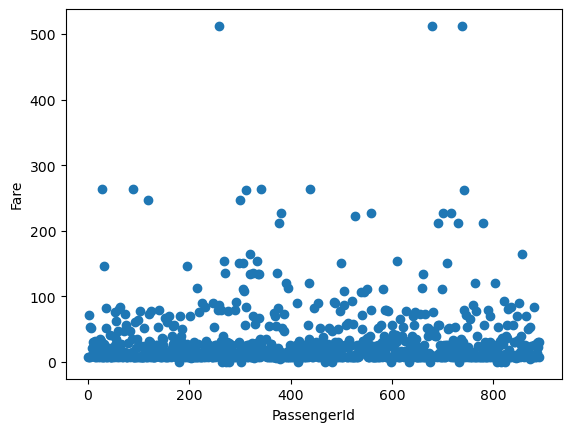

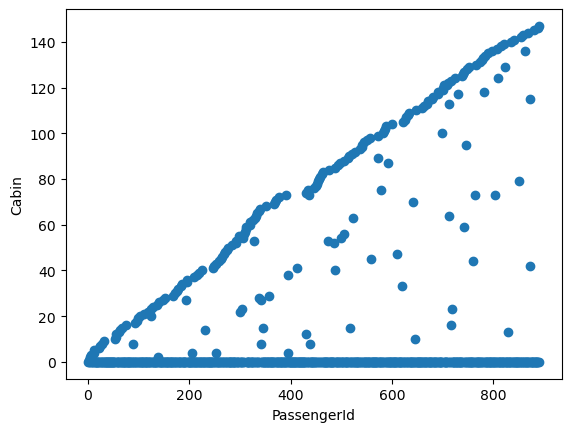

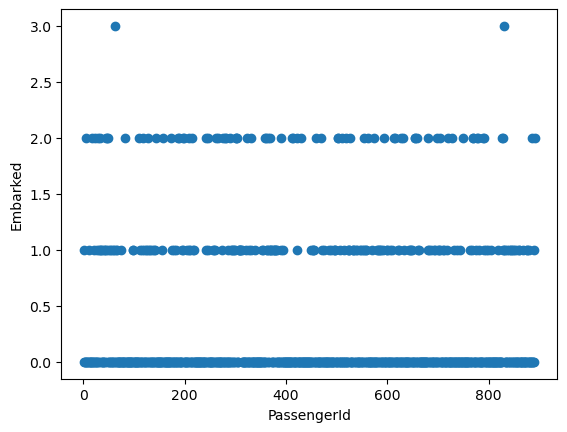

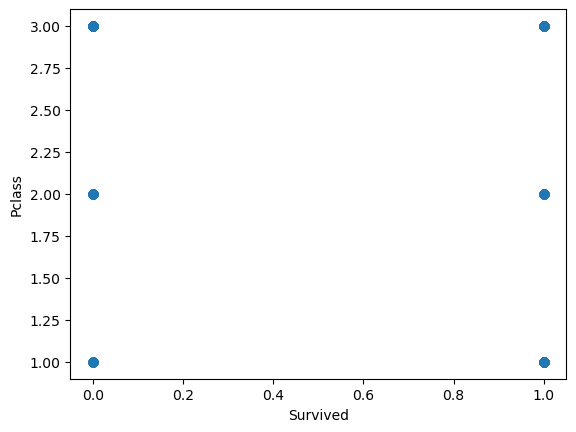

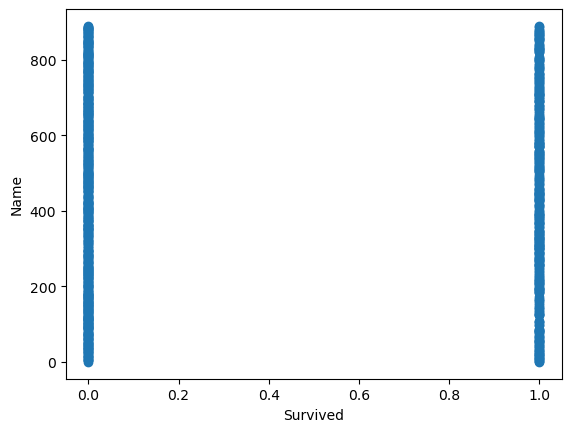

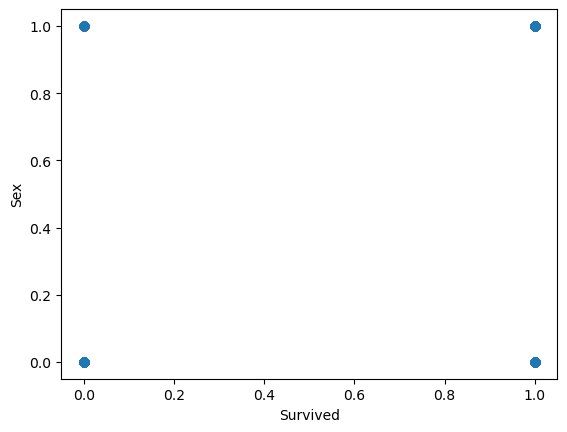

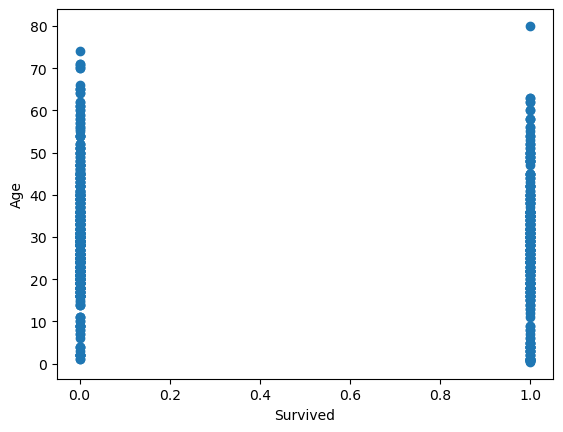

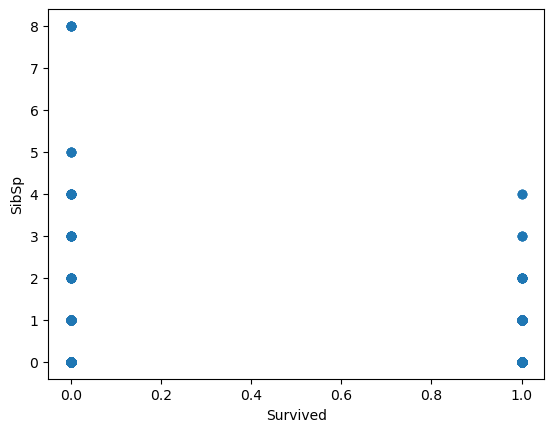

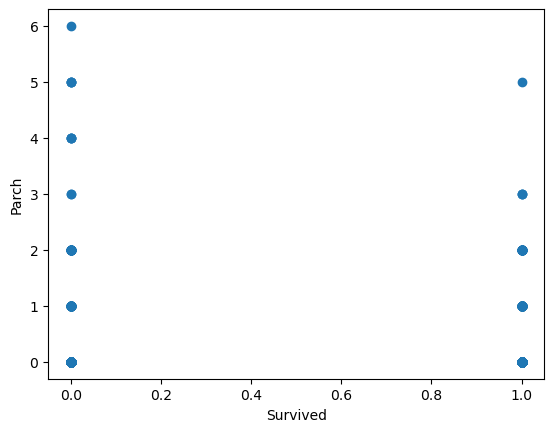

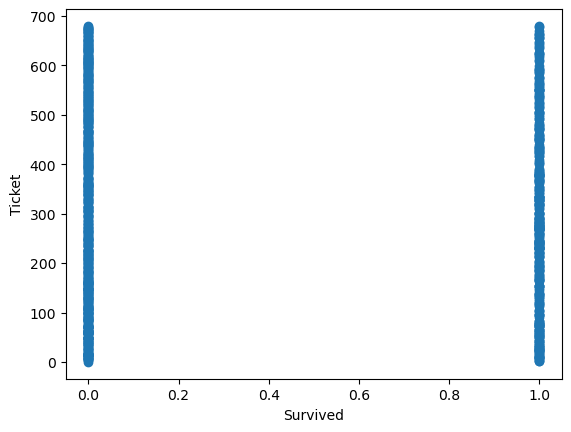

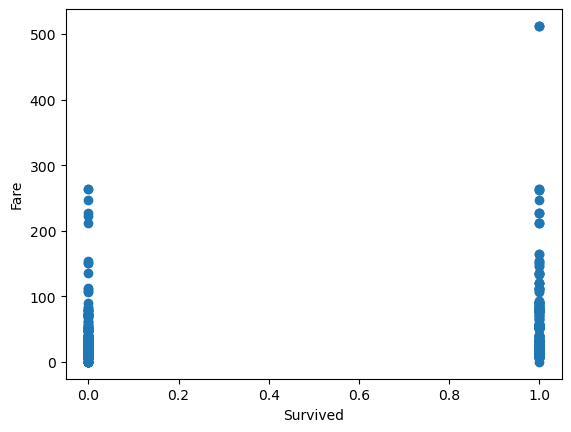

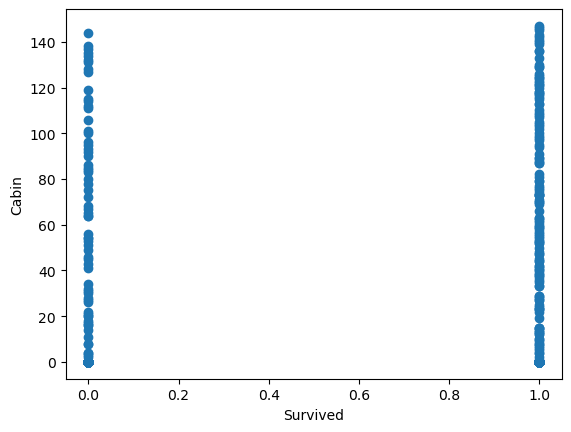

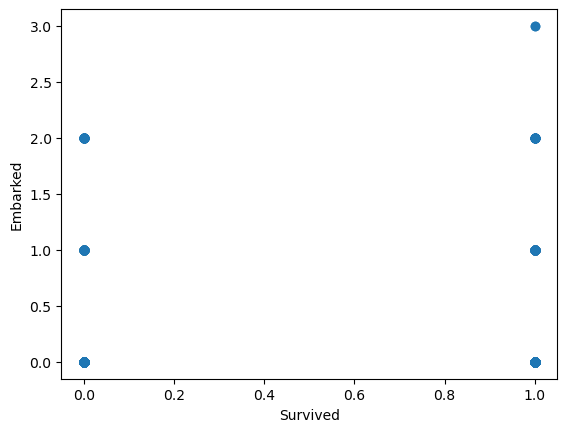

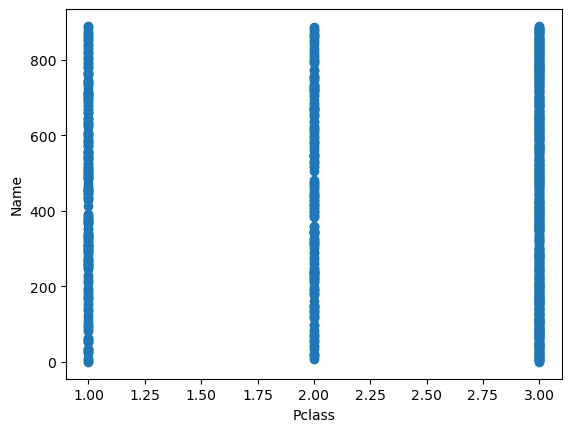

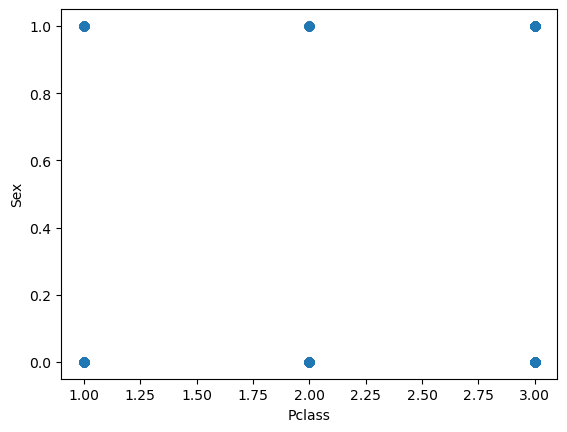

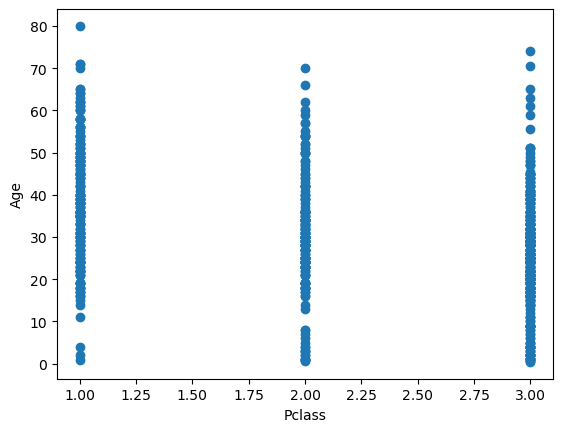

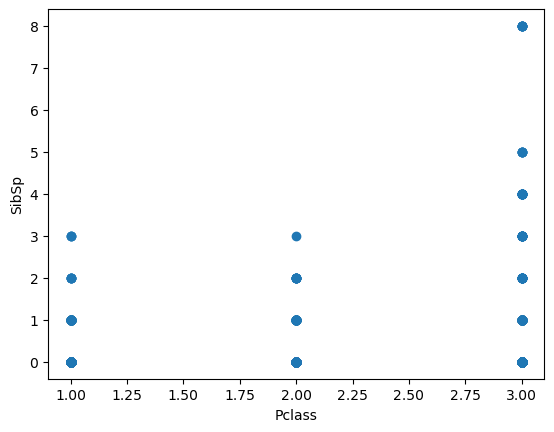

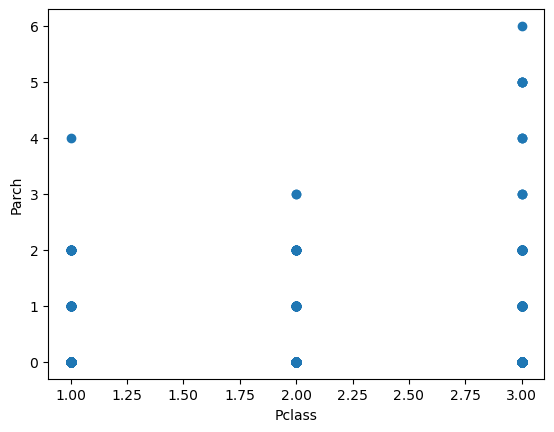

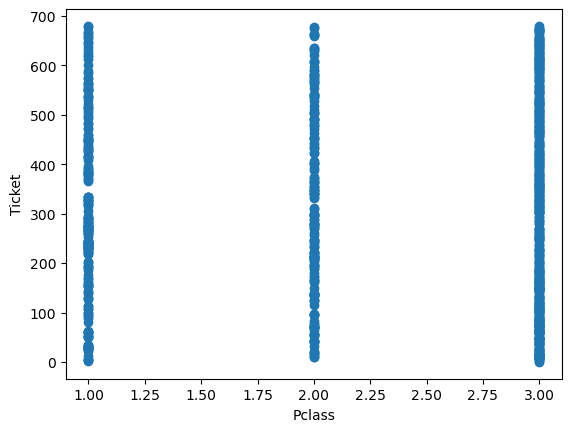

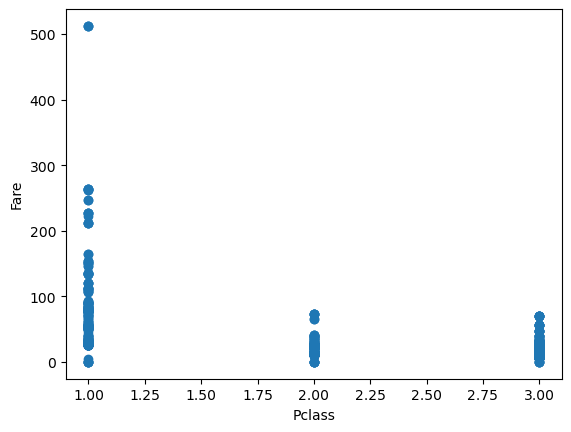

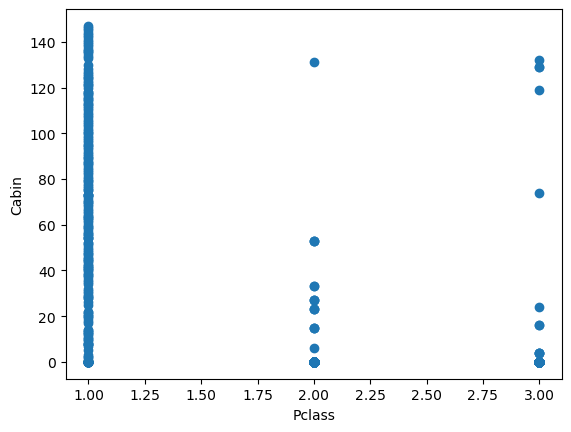

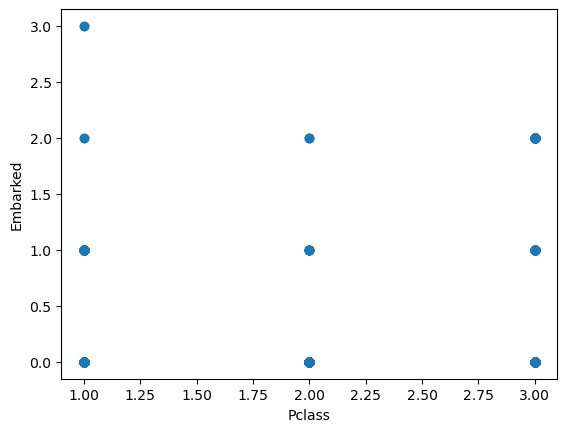

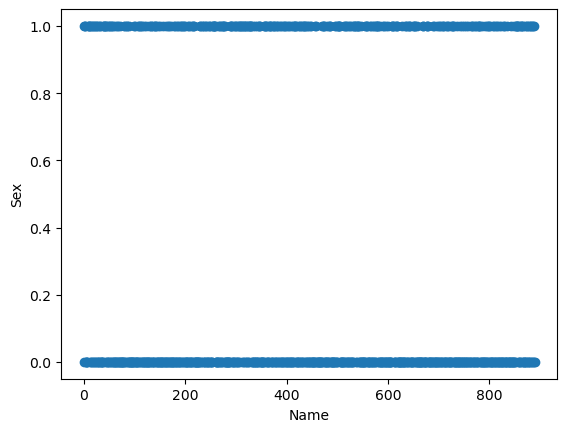

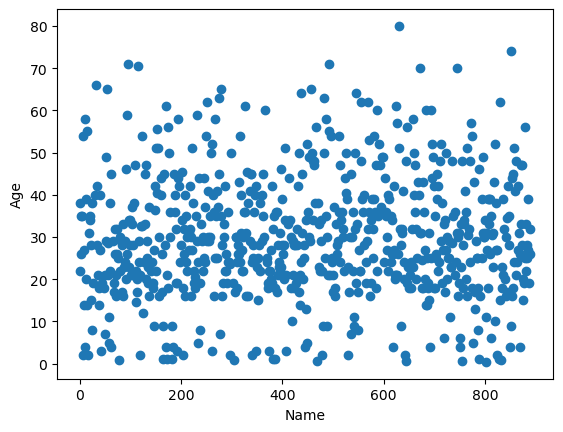

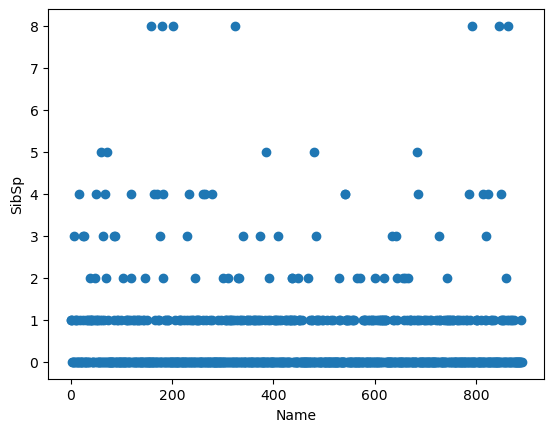

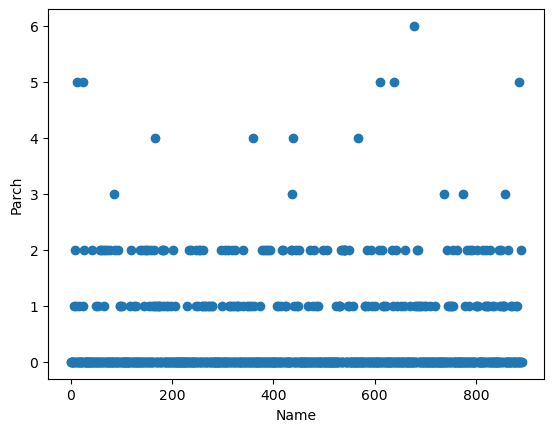

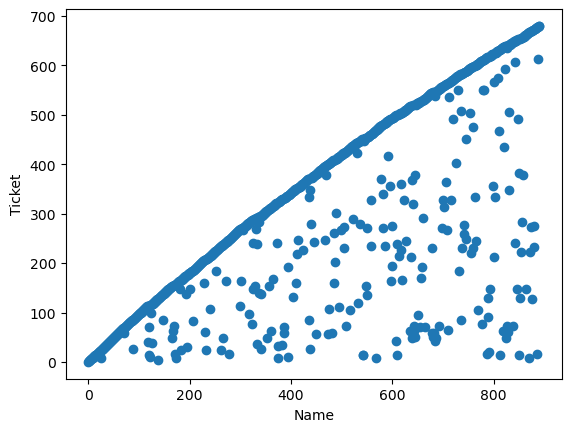

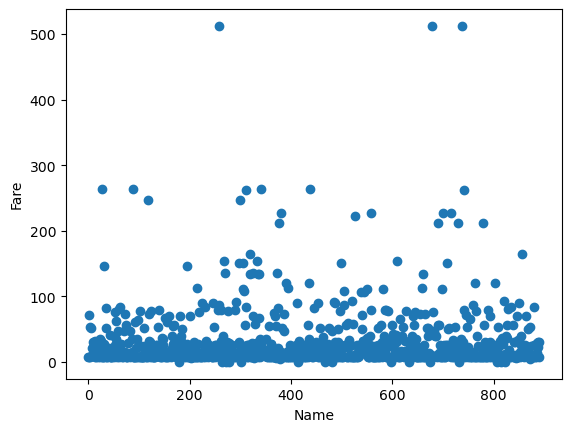

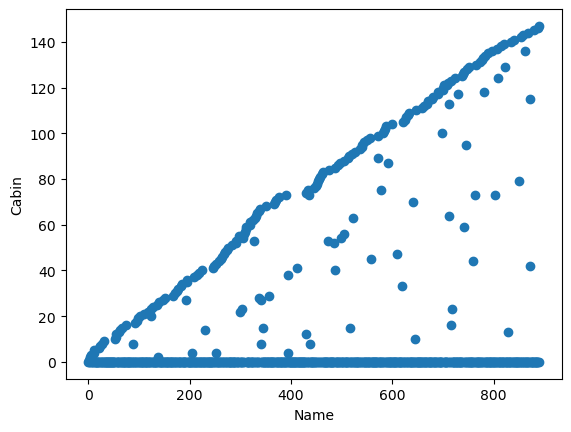

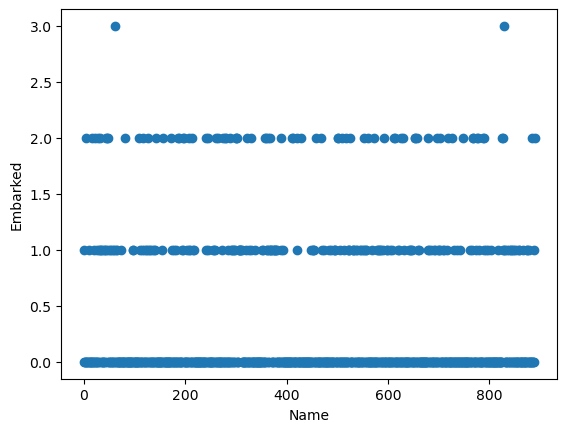

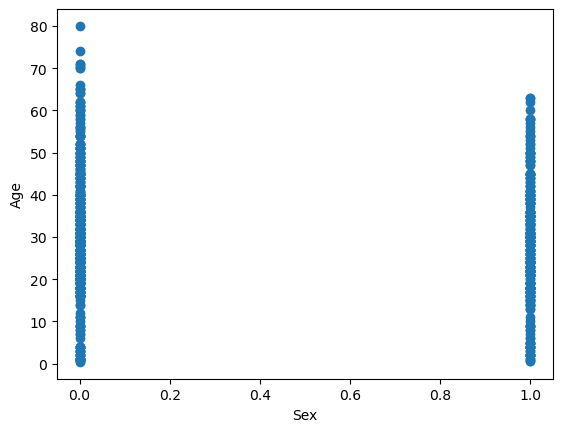

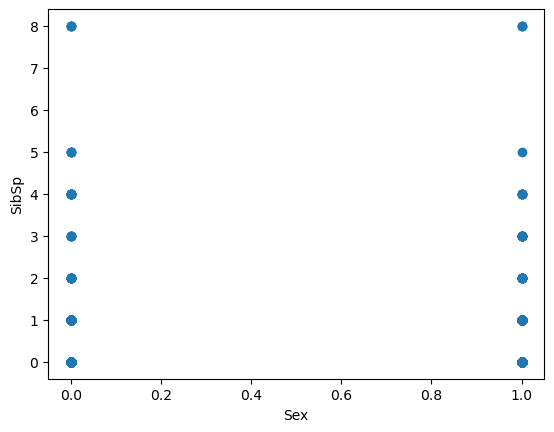

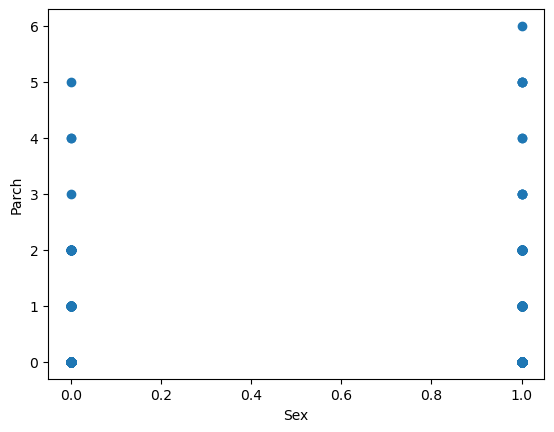

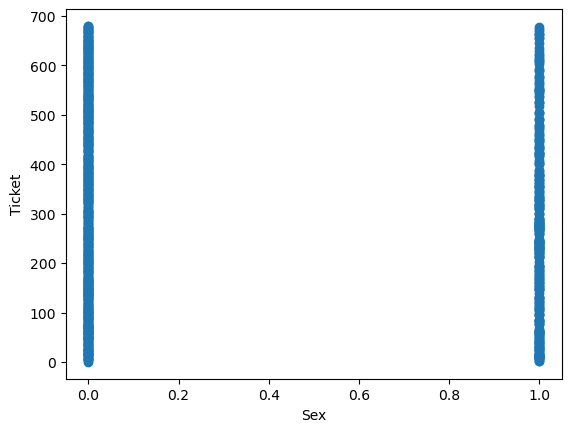

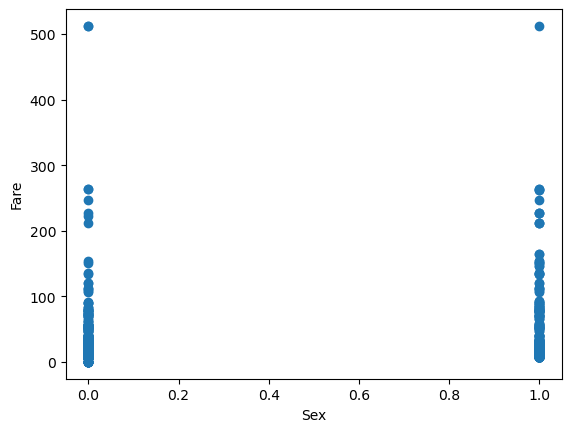

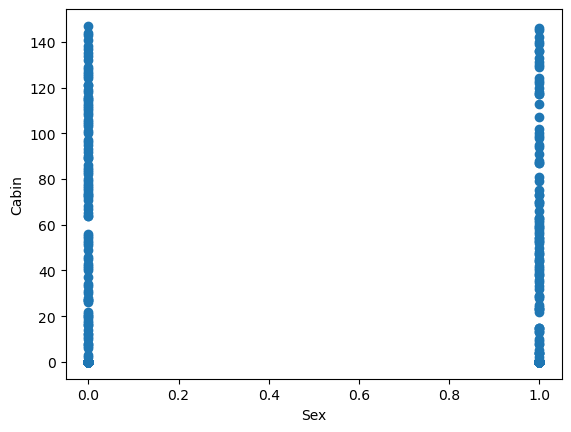

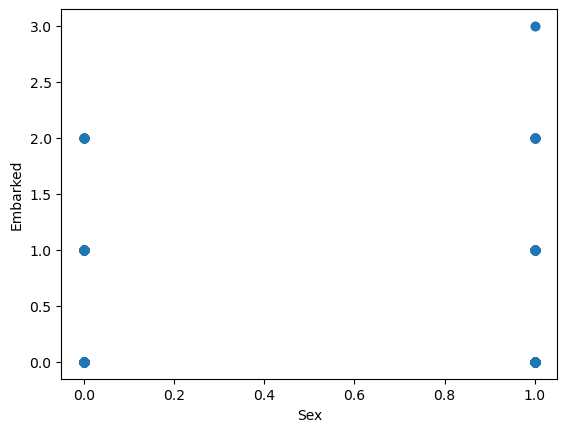

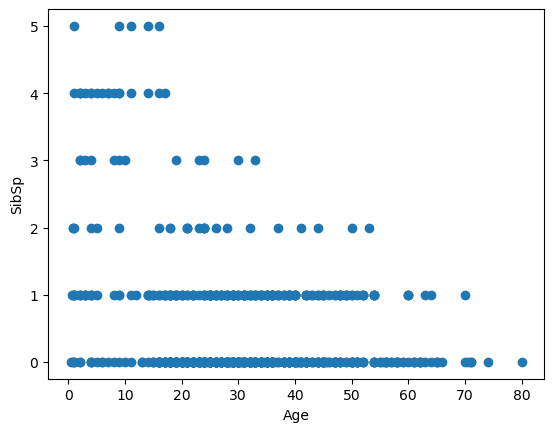

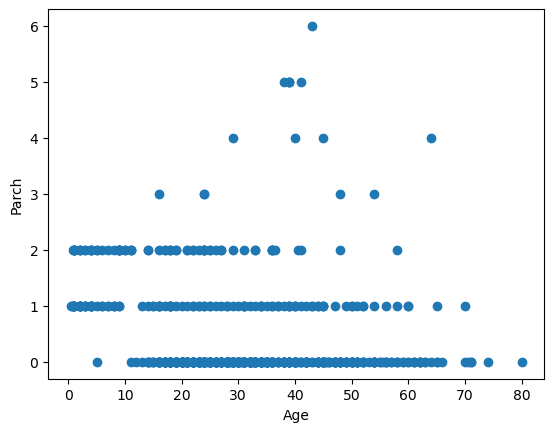

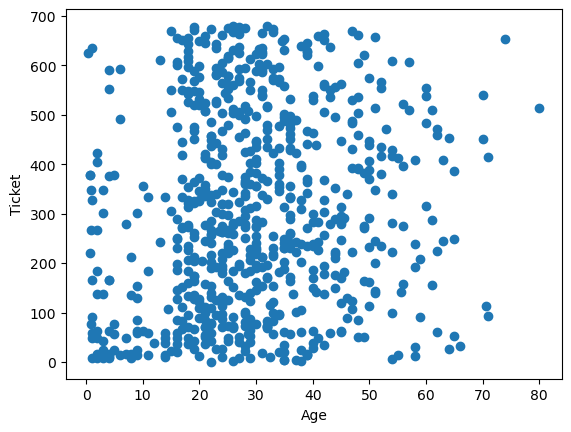

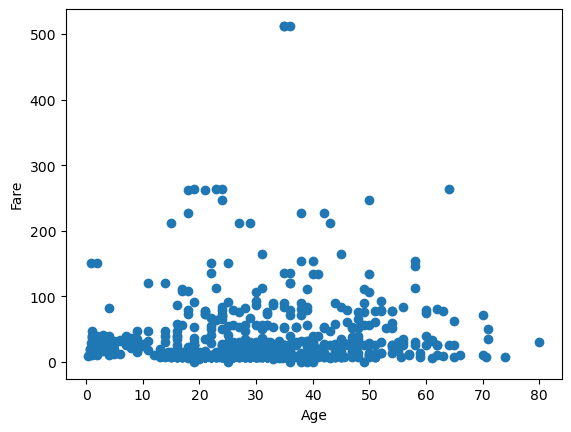

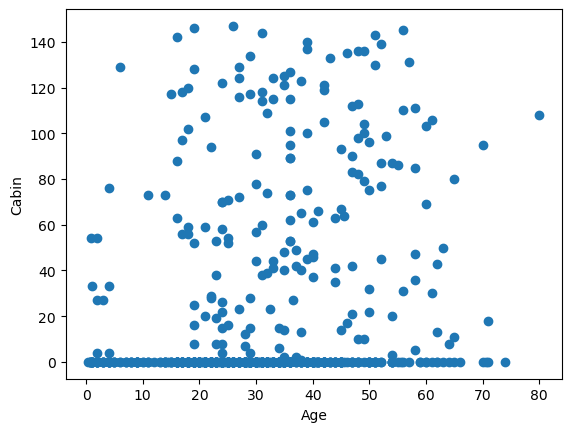

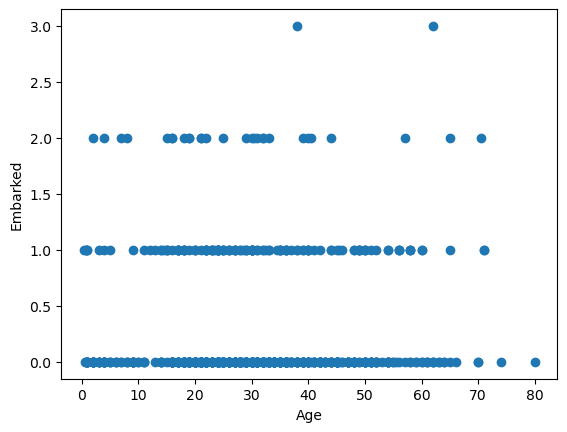

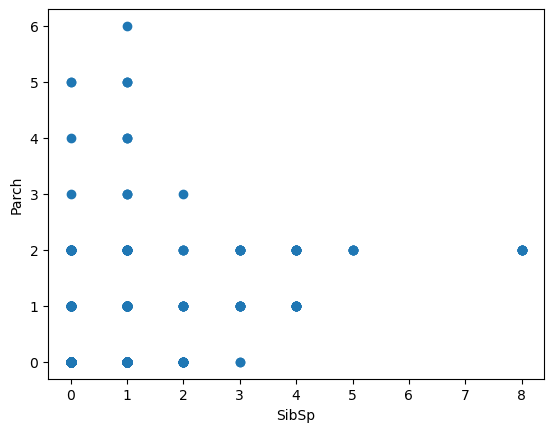

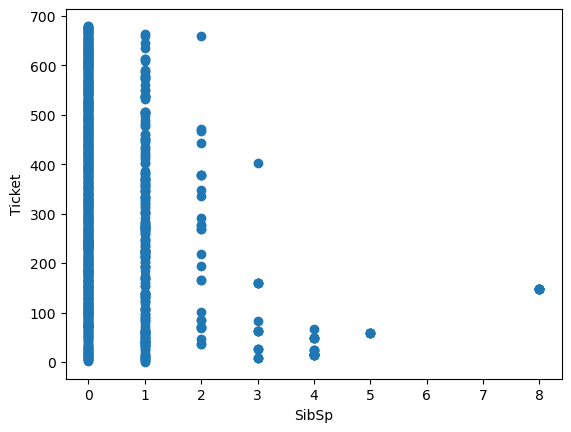

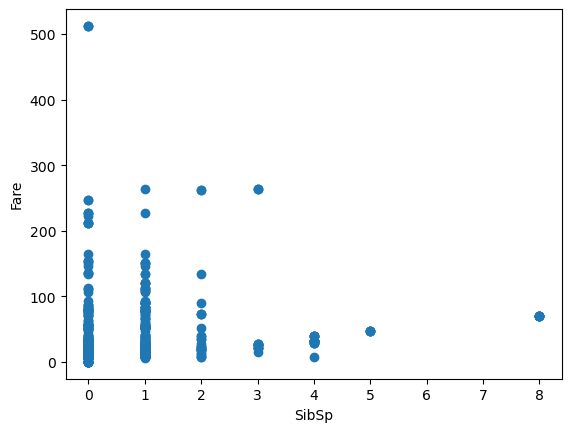

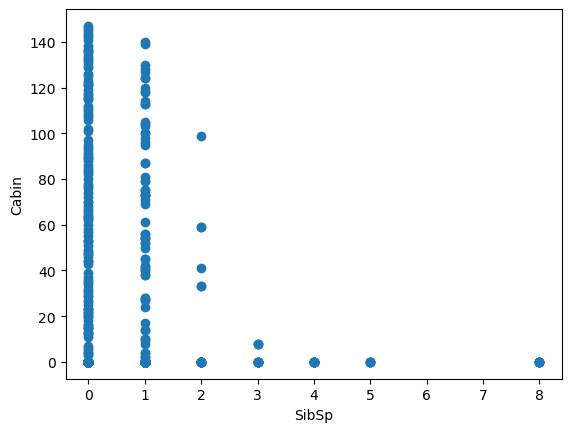

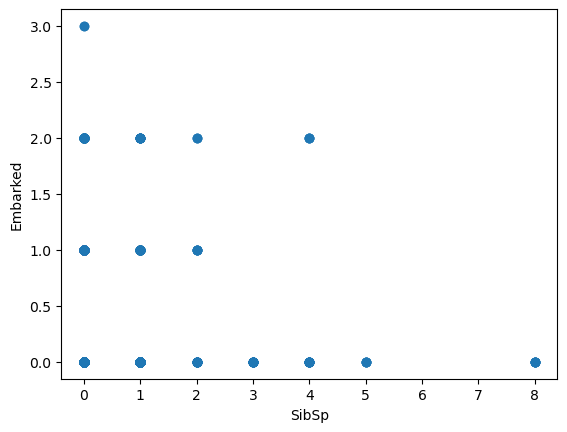

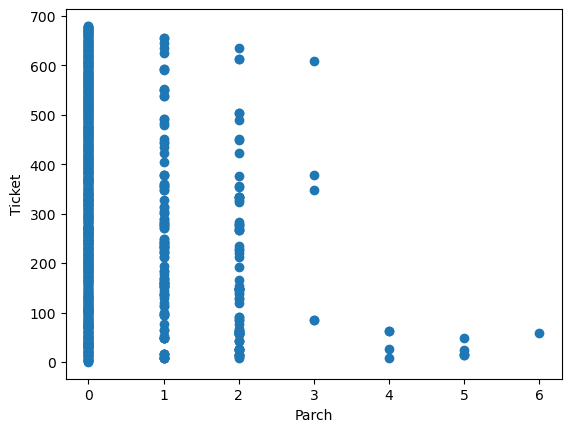

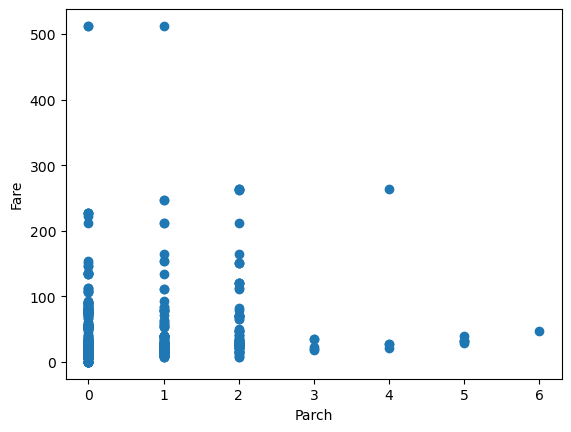

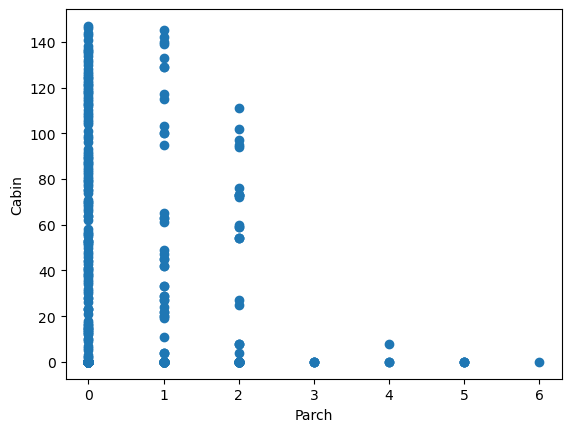

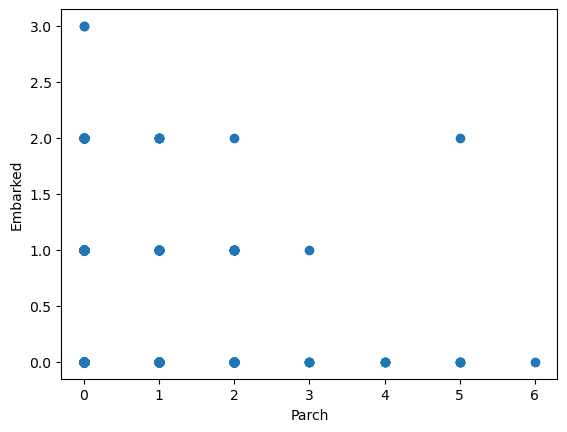

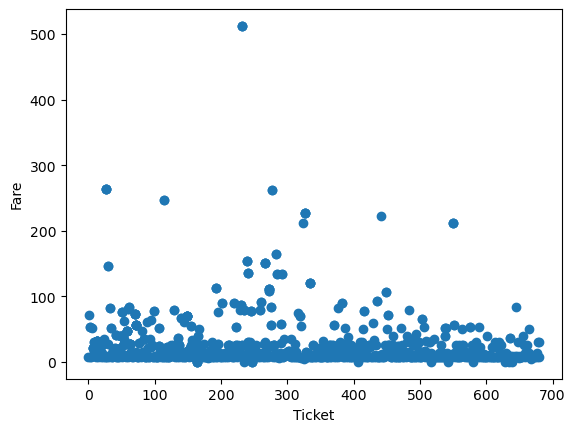

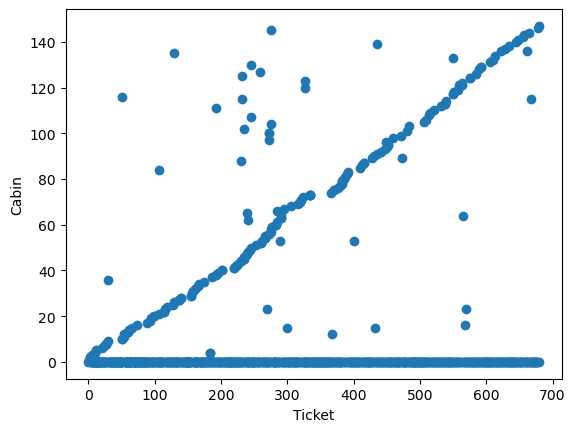

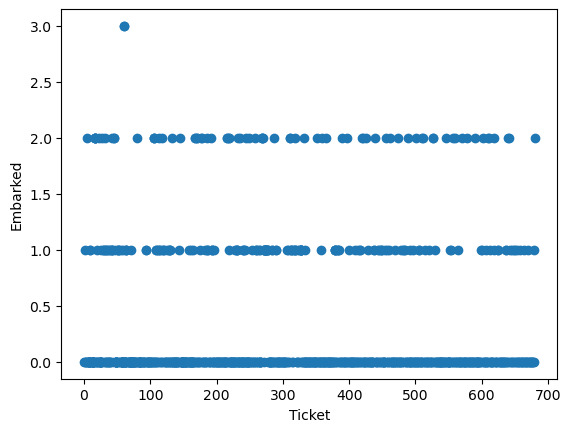

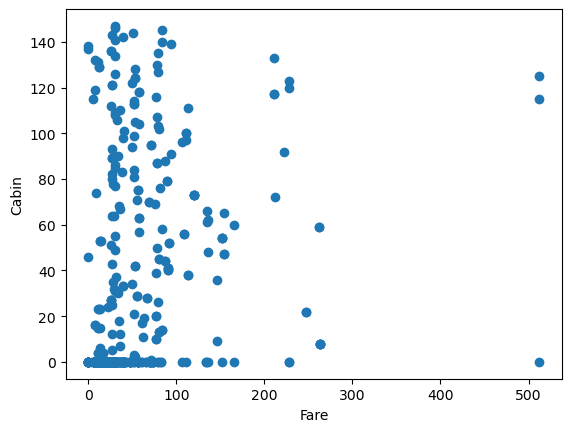

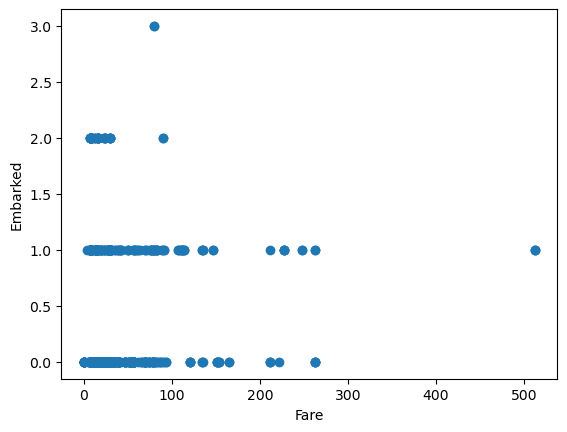

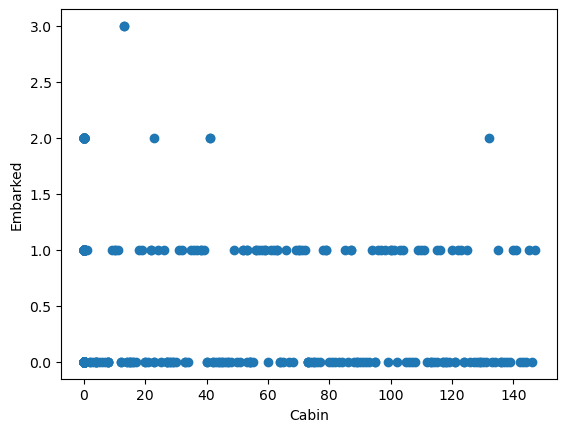

In [242]:
# Create a list of all columns
columns = df.columns.tolist()

# Create scatterplots for each pair of columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        mat.pyplot.scatter(df[columns[i]], df[columns[j]])
        mat.pyplot.xlabel(columns[i])
        mat.pyplot.ylabel(columns[j])
        mat.pyplot.show()

In [243]:
missing_data = df.isnull().sum()

for column, missing_count in missing_data.items():
  if missing_count > 0:
    print(f"Column '{column}' has {missing_count} missing values.")
    missing_rows = df[df[column].isnull()].index
    print(f"Missing data locations: {missing_rows}")


Column 'Age' has 177 missing values.
Missing data locations: Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)


In [244]:
# Identify categorical columns with missing values
cat_cols = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]

# Perform one-hot encoding on categorical columns with missing values
df = pd.get_dummies(df, columns=cat_cols, dummy_na=True)

# Print the updated DataFrame
print(df)


     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0              1         0       3     0    0  22.0      1      0       0   
1              2         1       1     1    1  38.0      1      0       1   
2              3         1       3     2    1  26.0      0      0       2   
3              4         1       1     3    1  35.0      1      0       3   
4              5         0       3     4    0  35.0      0      0       4   
..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
886          887         0       2   886    0  27.0      0      0     677   
887          888         1       1   887    1  19.0      0      0     678   
888          889         0       3   888    1   NaN      1      2     614   
889          890         1       1   889    0  26.0      0      0     679   
890          891         0       3   890    0  32.0      0      0     680   

        Fare  Cabin  Embarked  
0     7.2500      0         0  
1    71.283

In [245]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define outlier thresholds
lower_boundary = df[numerical_columns].mean() - 3 * df[numerical_columns].std()
upper_boundary = df[numerical_columns].mean() + 3 * df[numerical_columns].std()

# Remove outliers
df = df[(df[numerical_columns] >= lower_boundary) & (df[numerical_columns] <= upper_boundary)]

# Print the cleaned DataFrame
print(df)

     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0              1         0       3     0    0  22.0    1.0    0.0       0   
1              2         1       1     1    1  38.0    1.0    0.0       1   
2              3         1       3     2    1  26.0    0.0    0.0       2   
3              4         1       1     3    1  35.0    1.0    0.0       3   
4              5         0       3     4    0  35.0    0.0    0.0       4   
..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
886          887         0       2   886    0  27.0    0.0    0.0     677   
887          888         1       1   887    1  19.0    0.0    0.0     678   
888          889         0       3   888    1   NaN    1.0    2.0     614   
889          890         1       1   889    0  26.0    0.0    0.0     679   
890          891         0       3   890    0  32.0    0.0    0.0     680   

        Fare  Cabin  Embarked  
0     7.2500    0.0       0.0  
1    71.283

In [246]:
# Define a function to clean the data
def clean_data(df):
  # Replace typos and inconsistencies
  df['Sex'] = df['Sex'].replace({'Malee': 'Male', 'Femal': 'Female'})
  df['Embarked'] = df['Embarked'].replace({'Qeenstown': 'Queenstown', 'N/A': np.nan})

  # Convert invalid int values to NaN
  df['Age'] = df['Age'].replace(r'\D+', np.nan, regex=True)

  return df

# Clean the data
df = clean_data(df)

# Impute missing values with the median
df = df.apply(lambda x: x.fillna(x.median()))

# Print the new data frame
print(df.head())


   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3     0    0  22.0    1.0    0.0       0   
1            2         1       1     1    1  38.0    1.0    0.0       1   
2            3         1       3     2    1  26.0    0.0    0.0       2   
3            4         1       1     3    1  35.0    1.0    0.0       3   
4            5         0       3     4    0  35.0    0.0    0.0       4   

      Fare  Cabin  Embarked  
0   7.2500    0.0       0.0  
1  71.2833    1.0       1.0  
2   7.9250    0.0       0.0  
3  53.1000    2.0       0.0  
4   8.0500    0.0       0.0  


In [247]:
# Calculate the correlation matrix
corr = df.corr()

# Select the upper triangle of the correlation matrix
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))

# Find the features with high correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the highly correlated features
df.drop(to_drop, axis=1, inplace=True)

# Print the new data frame
print(df.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  \
0            1         0       3    0  22.0    1.0    0.0       0   7.2500   
1            2         1       1    1  38.0    1.0    0.0       1  71.2833   
2            3         1       3    1  26.0    0.0    0.0       2   7.9250   
3            4         1       1    1  35.0    1.0    0.0       3  53.1000   
4            5         0       3    0  35.0    0.0    0.0       4   8.0500   

   Cabin  Embarked  
0    0.0       0.0  
1    1.0       1.0  
2    0.0       0.0  
3    2.0       0.0  
4    0.0       0.0  


In [248]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Select the top 5 features with the highest chi-squared scores
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with the selected features
df_new = df[selected_features]

# Print the new DataFrame
print(df_new.head())



   Pclass  Sex  Ticket     Fare  Cabin
0       3    0       0   7.2500    0.0
1       1    1       1  71.2833    1.0
2       3    1       2   7.9250    0.0
3       1    1       3  53.1000    2.0
4       3    0       4   8.0500    0.0


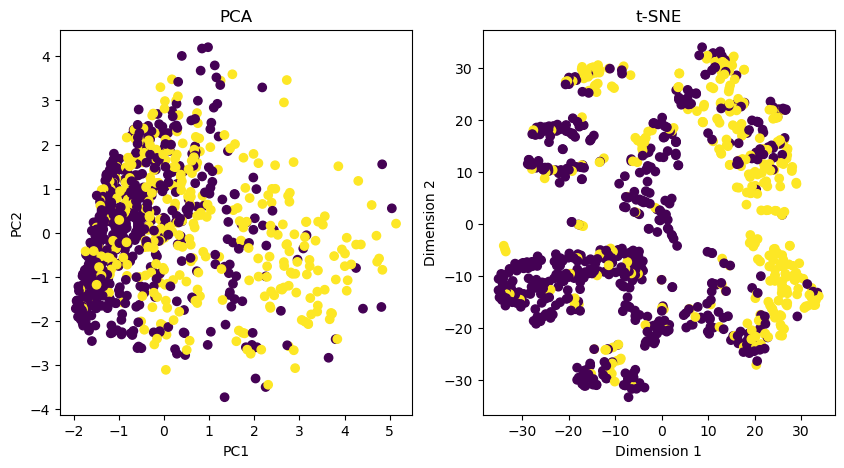

In [249]:
# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize the features
X = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE')

plt.show()

In [250]:
# Check for date-time format mismatches
for col in df.select_dtypes(include=['datetime64']):
  unique_formats = df[col].dt.strftime('%Y-%m-%d').unique()
  if len(unique_formats) > 1:
    print(f"Inconsistent date-time format in column '{col}'")

# Check for units of measurement variations
for col in df.select_dtypes(include=['float64', 'int64']):
  unique_units = df[col].unique()
  if any(not isinstance(x, (int, float)) for x in unique_units):
    print(f"Inconsistent units of measurement in column '{col}'")

# Check for capitalization differences
for col in df.select_dtypes(include=['object']):
  unique_values = df[col].unique()
  if any(x.lower() != x for x in unique_values):
    print(f"Inconsistent capitalization in column '{col}'")


Inconsistent units of measurement in column 'PassengerId'
Inconsistent units of measurement in column 'Survived'
Inconsistent units of measurement in column 'Pclass'
Inconsistent units of measurement in column 'Sex'
Inconsistent units of measurement in column 'Ticket'


In [251]:
# Standardize the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Standardize the data types
for column in df:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')
    elif df[column].dtype in ['int64', 'float64']:
        df[column] = df[column].astype('float32')

# Print the standardized data frame
print(df.head())


   passengerid  survived  pclass  sex   age  sibsp  parch  ticket       fare  \
0          1.0       0.0     3.0  0.0  22.0    1.0    0.0     0.0   7.250000   
1          2.0       1.0     1.0  1.0  38.0    1.0    0.0     1.0  71.283302   
2          3.0       1.0     3.0  1.0  26.0    0.0    0.0     2.0   7.925000   
3          4.0       1.0     1.0  1.0  35.0    1.0    0.0     3.0  53.099998   
4          5.0       0.0     3.0  0.0  35.0    0.0    0.0     4.0   8.050000   

   cabin  embarked  
0    0.0       0.0  
1    1.0       1.0  
2    0.0       0.0  
3    2.0       0.0  
4    0.0       0.0  


In [252]:
# Find categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Define a dictionary to map old labels to new labels
mapping = {
    "male": "Male",
    "female": "Female",
    "S": "Southampton",
    "C": "Cherbourg",
    "Q": "Queenstown",
}

# Replace old labels with new labels
for col in cat_cols:
    df[col] = df[col].map(mapping)

# Print the updated data frame
print(df.head())


   passengerid  survived  pclass  sex   age  sibsp  parch  ticket       fare  \
0          1.0       0.0     3.0  0.0  22.0    1.0    0.0     0.0   7.250000   
1          2.0       1.0     1.0  1.0  38.0    1.0    0.0     1.0  71.283302   
2          3.0       1.0     3.0  1.0  26.0    0.0    0.0     2.0   7.925000   
3          4.0       1.0     1.0  1.0  35.0    1.0    0.0     3.0  53.099998   
4          5.0       0.0     3.0  0.0  35.0    0.0    0.0     4.0   8.050000   

   cabin  embarked  
0    0.0       0.0  
1    1.0       1.0  
2    0.0       0.0  
3    2.0       0.0  
4    0.0       0.0  


In [253]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Normalize the numerical features
for feature in numerical_features:
    df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

# Print the new data frame
print(df.head())

   passengerid  survived  pclass  sex   age  sibsp  parch  ticket       fare  \
0          1.0       0.0     3.0  0.0  22.0    1.0    0.0     0.0   7.250000   
1          2.0       1.0     1.0  1.0  38.0    1.0    0.0     1.0  71.283302   
2          3.0       1.0     3.0  1.0  26.0    0.0    0.0     2.0   7.925000   
3          4.0       1.0     1.0  1.0  35.0    1.0    0.0     3.0  53.099998   
4          5.0       0.0     3.0  0.0  35.0    0.0    0.0     4.0   8.050000   

   cabin  embarked  
0    0.0       0.0  
1    1.0       1.0  
2    0.0       0.0  
3    2.0       0.0  
4    0.0       0.0  


In [254]:
# Load the data
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features)

# Save the processed CSV to a new file
df.to_csv('processed_titanic.csv', index=False)
